# Lista 3

In [14]:
import math, matplotlib.pyplot as plt, seaborn, numpy as np, random
from scipy.stats import expon
import seaborn as ssn


## zadanie 7

In [35]:
def fWT(a):
    return 3*np.exp(-3*a)

def fZT(b):
    return 2*np.exp(-2*b) + np.exp(-b) - 3*np.exp(-3*b)

def FZT(a):
    return 1-np.exp(-2*a) - np.exp(-a) +np.exp(-3*a)

def FWT(a):
    return 1-np.exp(-3*a) 

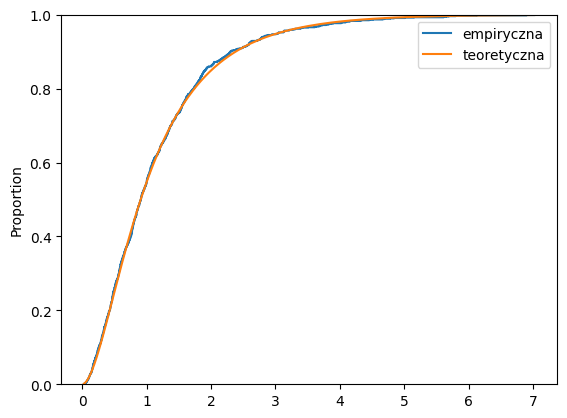

In [36]:
X = np.random.exponential(1/2, 1000)
# X = expon.rvs(0,1,1000) # 1000 zmiennyc Exp(1)
Y = np.random.exponential(1,1000)
Z = []
for i in range(1000):
    Z.append(max(X[i], Y[i]))
Z = sorted(Z)
W = []
W = [min(X[i], Y[i]) for i in range(1000)]
W = sorted(W)
# xs = np.linspace(0,20,1000)
Zs = [FZT(z) for z in Z]
Ws = [FWT(w) for w in W]
zs = [fZT(z) for z in Z]
ws = [fWT(w) for w in W]
seaborn.ecdfplot(data = Z, label = 'empiryczna' )
plt.plot(Z, Zs, label='teoretyczna')
plt.legend()
plt.show()

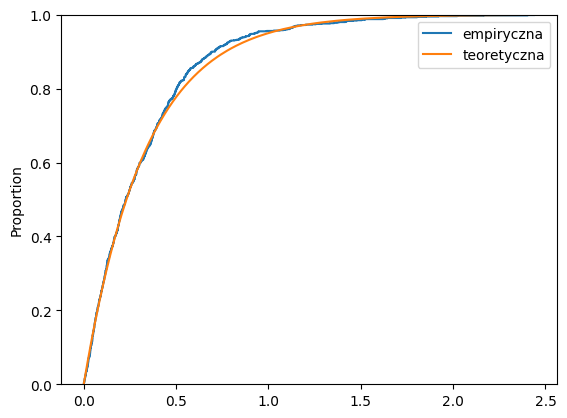

In [37]:
seaborn.ecdfplot(data = W, label = 'empiryczna' )
plt.plot(W, Ws, label='teoretyczna')
plt.legend()
plt.show()

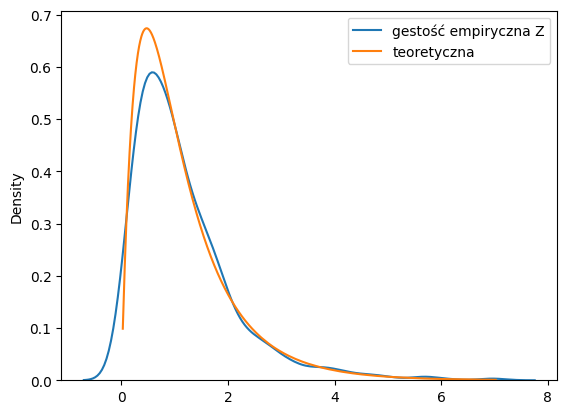

In [38]:
seaborn.kdeplot(Z, label= 'gestość empiryczna Z')
plt.plot(Z, zs, label='teoretyczna')
plt.legend()
plt.show()

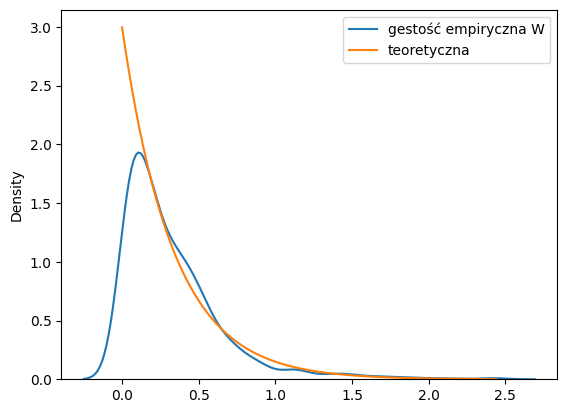

In [39]:
seaborn.kdeplot(W, label= 'gestość empiryczna W')
plt.plot(W, ws, label='teoretyczna')
plt.legend()
plt.show()

## zadanie 8

In [1]:
dyr = [41,27,35,33,25,47,38,53,43,35,36]
wiz = [38,24,34,29,27,47,43,52,39,31,29]


In [13]:
def rangi(tablica):
    n = len(tablica)
    tab = tablica.copy()
    tab.sort(reverse = True)
    r = [0]*n
    for i in range(n):
        a = tablica.count(tab[i]) 
        if not a>1:
            r[tablica.index(tab[i])] = i+1
        else:
            suma = a
            indeksy = []
            for j in range(n):
                if tab[i] == tablica[j]:
                    indeksy.append(j)
            for k in range(n):
                if tab[i] == tab[k]:
                    suma += k
            for o in indeksy:
                r[o] = suma/a
    return r

In [19]:
tab1=rangi(dyr)
tab2 =rangi(wiz)

print(rangi(dyr))
print(rangi(wiz))

[4, 10, 7.5, 9, 11, 2, 5, 1, 3, 7.5, 6]
[5, 11, 6, 8.5, 10, 2, 3, 1, 4, 7, 8.5]


In [23]:
def spearman(tab1, tab2):
    n = len(tab1)
    return 1 - 6*sum(i**2 for i in [abs(tab1[k]-tab2[k]) for k in range(n)])/(n*(n**2-1))

In [24]:
print(spearman(rangi(dyr),rangi(wiz)))

0.9227272727272727


In [25]:
X = [5,4,6,2,1,3]
Y = [6,2,3,5,1,4]
print(spearman(X,Y))

0.3142857142857143
